In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [45]:
df = pd.read_csv('/home/andrey/ds_bootcamp/Phase_0/Week_3/P0_W3_D4_property_project/_data.csv', sep=',', index_col=0)
#df.head(5)

## Этот график показывает количество строк и столбцов DataFrame.
- Синий столбец представляет количество около 23,000 строк.
- Зеленый столбец представляет количество 24 столбца.

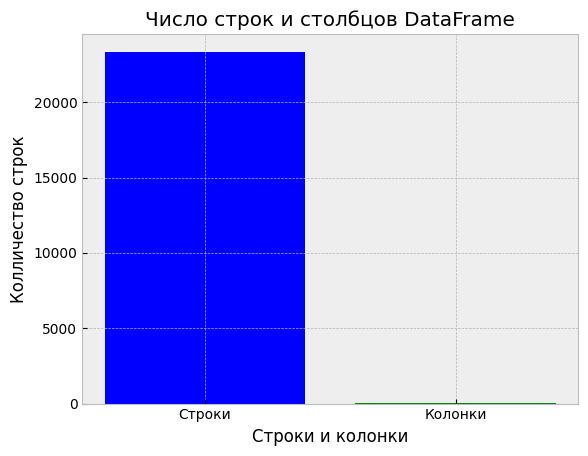

In [39]:
num_rows, num_columns = df.shape
data = {'Строки': num_rows, 'Колонки': num_columns}
plt.bar(data.keys(), data.values(), color=['blue', 'green'])
plt.xlabel('Строки и колонки')
plt.ylabel('Колличество строк')
plt.title('Число строк и столбцов DataFrame')
plt.show()

## Этот круговой диаграмма показывает соотношение пропущенных и заполненных значений в DataFrame из всего колличства ячеек.
- Зеленая область 78.9% представляет долю заполненных ячеек в данных.
- Красная область 21.1% представляет долю пропущенных значений или пустых ячеек, а так же некорректно заполненные значением NaN в данных.

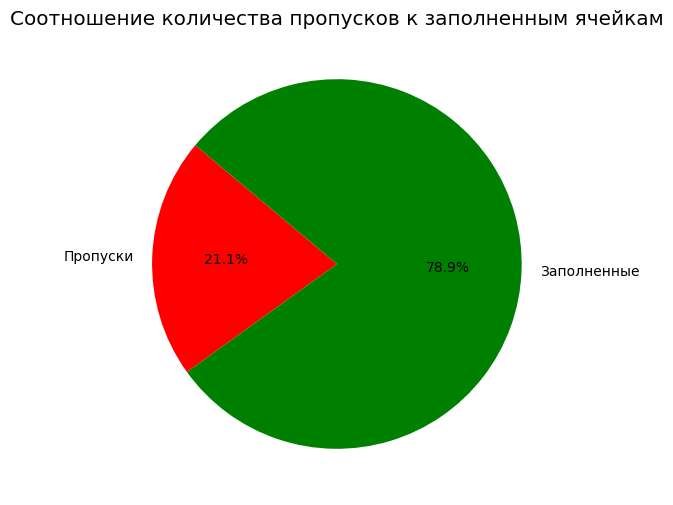

In [40]:
total_cells = df.size
missing_values_count = df.isna().sum().sum()
filled_values_count = total_cells - missing_values_count
data = [missing_values_count, filled_values_count]
labels = ['Пропуски', 'Заполненные']
plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Соотношение количества пропусков к заполненным ячейкам')
plt.show()

## Этот горизонтальный столбчатый график отображает число пропусков по каждой колонки в DataFrame. 

- Колонки Серия дома пропусков больше 20,000 а также Название ЖК имеет примерно 17,500 пропусков.
- Колонки Парковка, Высота потолков, Мусоропровод, и Площадь комнат также имеют значительное количество пропусков более 10,000 тыс.
- Колонки ID объявления, Дом, Цена, Площадь, Адрес, Тип, Телефоны, Цена, Описание и Ссылка на объявление не имеют пропуски.

Text(0.5, 1.0, 'Число пропусков по колонкам')

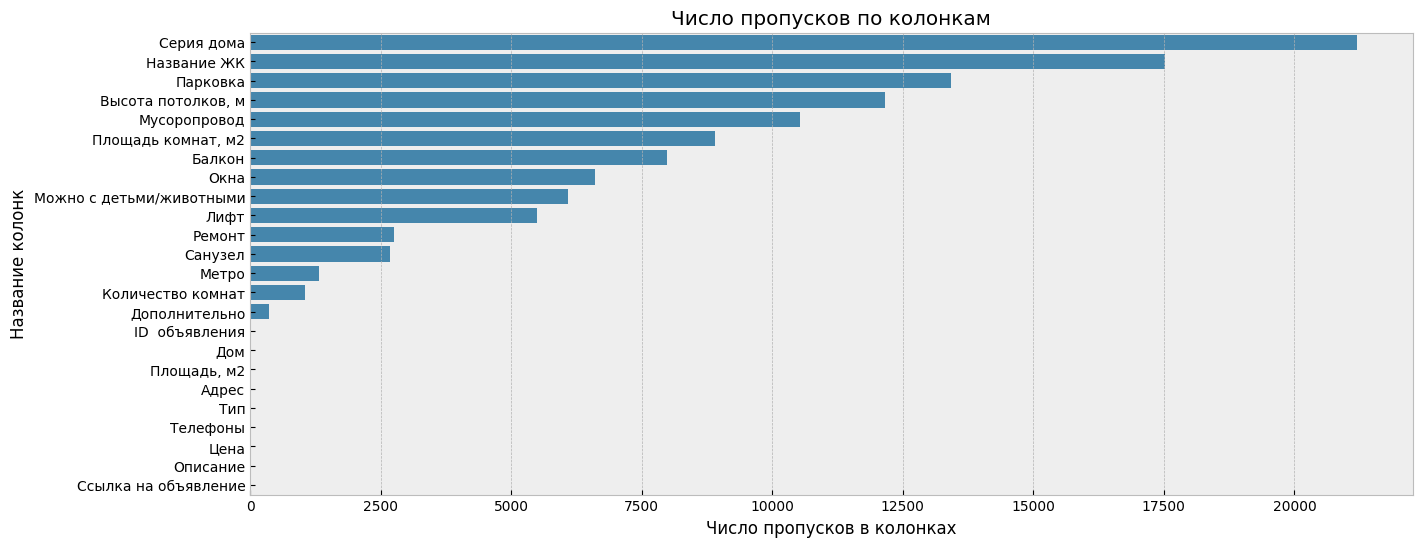

In [41]:
nan_counts = df.isna().sum().sort_values(ascending=False)
plt.style.use("bmh")
plt.figure(figsize=(15, 6))
sns.barplot(y=nan_counts.index, x=nan_counts.values)
plt.ylabel("Название колонк")
plt.xlabel("Число пропусков в колонках")
plt.title("Число пропусков по колонкам")

## Этот график гистограмма отображает среднюю стоимость аренды квартиры от количества комнат.

- График отображает линейную зависимость (чем больше комнат тем больше аренда)
- Квартиры с 1 комнатой имеют самую низкую среднюю стоимость примерно 30,000 тысяч.
- Квартиры с 6 комнатами имеют самую высокую среднюю стоимость около 600,000 тысяч.

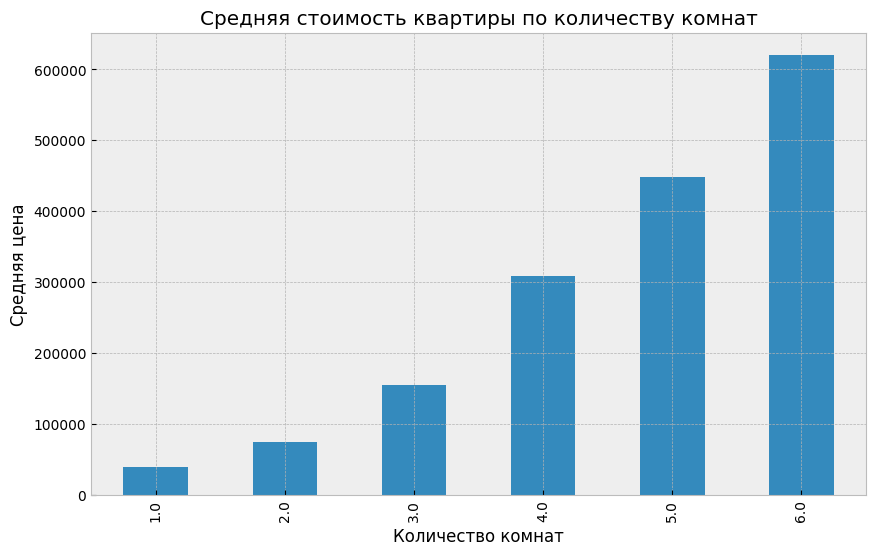

In [42]:
#Все значения в колонке 'Цена' в строки
df['Цена'] = df['Цена'].astype(str)

# Извлекаем числовое значение цены
df['Цена числовая'] = df['Цена'].apply(lambda x: x.split(' ')[0])
df['Цена числовая'] = pd.to_numeric(df['Цена числовая'], errors='coerce')

# Извлекаем числовое значение количества комнат
df['Количество комнат'] = df['Количество комнат'].astype(str)
df['Количество комнат числовое'] = df['Количество комнат'].apply(lambda x: x.split(' ')[0])
df['Количество комнат числовое'] = pd.to_numeric(df['Количество комнат числовое'], errors='coerce')

# Группируем по количеству комнат и находим среднюю стоимость
average_price_per_room = df.groupby('Количество комнат числовое')['Цена числовая'].mean()

# Построение графика
average_price_per_room.plot(kind='bar', figsize=(10, 6))
plt.title('Средняя стоимость квартиры по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.show()